In [2]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

In [3]:
X = []  
y = []   

In [4]:
def loadDataSet():
    f=open('Question5.txt')
    # Read data line by line and use strip to remove the Spaces 
    for line in f.readlines():
        nline=line.strip().split()
        # X has two columns
        X.append([float(nline[0]),float(nline[1])])
        y.append(int(nline[2]))
    return mat(X).T ,mat(y)

In [5]:
X,y=loadDataSet()
print(X.shape, y.shape)

(2, 100) (1, 100)


Text(0, 0.5, 'X_1')

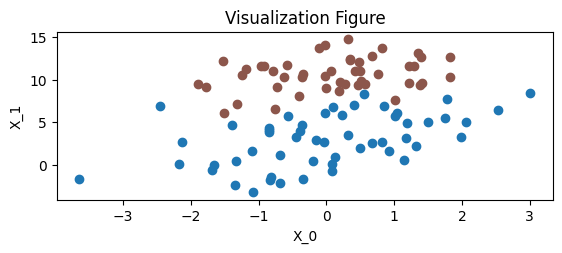

In [8]:
# Initial Data Visualization
x0 = X[0, :]
x1 = X[1, :]
x_true = [[], []]
x_false = [[], []]
for i in range(X.shape[1]):
    if y[0, i] == 1:
        x_true[0].append(x0[0, i])
        x_true[1].append(x1[0, i])
    else:
        x_false[0].append(x0[0, i])
        x_false[1].append(x1[0, i])

# Plot the data visualization figure
# data points
plt.figure(2)
plt.subplot(212)
plt.scatter(x_true[0], x_true[1], c="#1f77b4")
plt.scatter(x_false[0], x_false[1], c="#8c564b")
plt.title("Visualization Figure")
plt.xlabel("X_0")
plt.ylabel("X_1")

In [9]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [10]:
def Logistic(X,y,W,b,n,alpha,iterations):
    
    '''
    X: input data
    y: labels
    W: weight
    b: bias
    n: number of samples
    alpha: learning rate
    iterations: the number of iteration
    '''
    # add bias column to training data
    # B = ones((1, n))
    # X = append(X, B, axis=0)
    
    J = zeros((iterations,1))
    for i in range(iterations):   
        # step1 forward propagation
        z = np.dot(W.T, X) + b
        y_hat = sigmoid(z) 

        E = -sum(multiply(y, log(y_hat)) + multiply((1 - y), log(1 - y_hat)))
        J[i, 0] += E

        # step2 backpropagation
        dw = np.dot(X, (y_hat - y).T)
        db = np.sum(y_hat - y)

        # step3 gradient descent 
        W -= alpha * dw
        b -= alpha * db

    return y_hat,W,b,J

In [11]:
def plotBestFit(X,y,J,W,b,n,y_hat):
    
    '''
    X: input data
    y: labels
    J: cost values
    W: weight
    b: bias
    n: number of samples
    y_hat: the predict labels from Logistic Regression 
    '''
    
    # Plot cost function figure
    x = arange(0, J.shape[0], 1)
    plt.figure(1)
    plt.subplot(211)
    plt.scatter(x, J)
    plt.title("Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    
    x0 = X[0, :]
    x1 = X[1, :]
    x_true = [[], []]
    x_false = [[], []]
    for i in range(n):
        if y[0, i] == 1:
            x_true[0].append(x0[0, i])
            x_true[1].append(x1[0, i])
        else:
            x_false[0].append(x0[0, i])
            x_false[1].append(x1[0, i])

    # Plot the final classification figure
    # data points
    plt.figure(2)
    plt.subplot(212)
    plt.scatter(x_true[0], x_true[1], c="#1f77b4")
    plt.scatter(x_false[0], x_false[1], c="#8c564b")
    plt.title("Classification Figure")
    plt.xlabel("X_0")
    plt.ylabel("X_1")
    
    # decision boundary
    axes = plt.gca()
    x_axis = linspace(floor(axes.get_xlim()[0]), ceil(axes.get_xlim()[1]), 100)
    line = -(W[0]/W[1]) * mat(x_axis) - (b/W[1])
    plt.plot(x_axis, line.T) 

    plt.show()

# Iterations Tried
We attempted iteration numer $10, 100, 1000, 10,000$ and $100,000$ while keeping the learning rate constant at $\alpha=0.001$. With each increase in order, we observed a monotonic decrease in the loss. However, the step size of the final loss from $\text{iterations} = 100$ to $\text{iterations} = 1000$ only decreases the loss from $\approx 15\to\approx 10$, while an increase from $100\to 1000$ decreased the loss from $\approx 35\to \approx 15$. Increasing past $1000$ shows the loss stablize around $10$. This means that we can train at $1000$ iterations and stop, without wasting more time iterating. $1000$ appears to be the optimal iteration number for maximum accuracy. 

# Learning Rates Tried
Attempting $\alpha = 0.01$ yeilds more flucuation near the beginning of our loss plot, but ultimately converges as the iterations continue. Reducing alpha to $0.005$ produces a similar result, with less fluctuation at the beginning of the training iterations. Reducing further to $0.001$ appears to reduce most of these fluctuations, producing an almost smooth loss curve.

# Combinations Tried
Attempting larger learning rates with smaller iteration numbers appears to get us near the best loss the quickly. Increasing the learning rate to $0.01$ and decreasing our iteration number to $200$ yeilds a loss fluctuating around $20$, which is near to our minimum acheived error value of $10$. However a smaller learning rate of $0.001$ achieves an error of $26$, and fluctuates much less near the final iteration. We conclude that $\alpha = 0.001$ is the optimal learning rate at any iteration number. 

In [70]:
num = X.shape[0]  # number of features
n = X.shape[1] # number of samples

In [215]:
# Initianlize the weights and bias
W = []
for i in range(num):
    W.append(random.uniform(0, .1))
b = 1
W = mat(W)
W = W.reshape(-1, 1)

print(W)

[[0.08399378]
 [0.07848965]]


In [216]:
# Learning rate
alpha= 0.001

In [217]:
# Iterations
iterations = 1000

In [218]:
# Get the results from Logistic function
y_hat,W,b,J = Logistic(X, y, W, b, n, alpha, iterations)

[[107.66375094]
 [ 46.55658672]
 [ 42.53782755]
 [ 42.07730045]
 [ 41.88394762]
 [ 41.69373809]
 [ 41.50585081]
 [ 41.32024578]
 [ 41.13688386]
 [ 40.95572675]
 [ 40.77673693]
 [ 40.59987768]
 [ 40.42511303]
 [ 40.25240777]
 [ 40.08172738]
 [ 39.9130381 ]
 [ 39.74630683]
 [ 39.58150115]
 [ 39.41858931]
 [ 39.25754021]
 [ 39.09832337]
 [ 38.94090894]
 [ 38.78526765]
 [ 38.63137083]
 [ 38.4791904 ]
 [ 38.32869883]
 [ 38.17986912]
 [ 38.03267483]
 [ 37.88709003]
 [ 37.74308932]
 [ 37.60064778]
 [ 37.45974099]
 [ 37.320345  ]
 [ 37.18243633]
 [ 37.04599196]
 [ 36.91098931]
 [ 36.77740624]
 [ 36.64522104]
 [ 36.5144124 ]
 [ 36.38495944]
 [ 36.25684166]
 [ 36.13003896]
 [ 36.00453161]
 [ 35.88030026]
 [ 35.75732594]
 [ 35.63559   ]
 [ 35.51507417]
 [ 35.3957605 ]
 [ 35.27763139]
 [ 35.16066955]
 [ 35.04485802]
 [ 34.93018015]
 [ 34.81661959]
 [ 34.7041603 ]
 [ 34.59278652]
 [ 34.48248278]
 [ 34.37323389]
 [ 34.26502494]
 [ 34.15784129]
 [ 34.05166854]
 [ 33.94649256]
 [ 33.84229949]
 [ 33.73

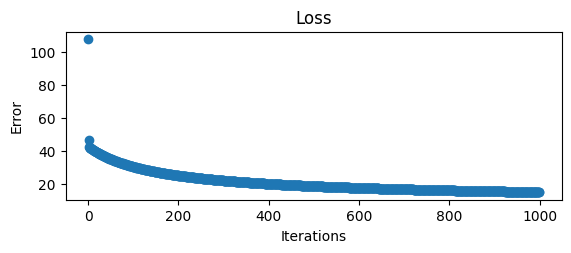

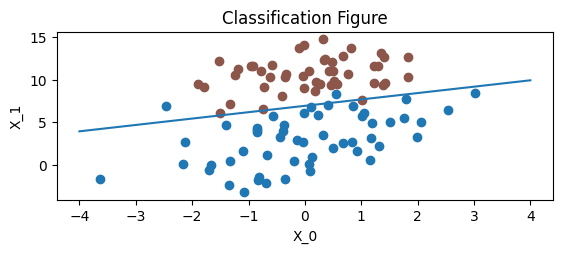

In [232]:
# Plot figures
plotBestFit(X, y, J, W, b, n, y_hat)